In [467]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier, XGBRegressor
from sklearn.metrics import roc_curve, roc_auc_score

plt.style.use('ggplot') # this format looks nice
pd.set_option('display.max_columns', 200) # show more columns in output

In [468]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

# Understanding the Data
* shape
* head and tail
* dtypes
* describe
* missing values

In [469]:
# Make sure data is loaded
# make sure I know what all the columns mean
train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [470]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [471]:
# makes sure the types are what we want/expect
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [472]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Cleaning the Data
* drop rows we do not need
* find duplicated columns/rows
* renaming
* feature creation

In [473]:
# chose the columns that we want to keep
# can choose which columns to keep or drop
train = train[[
    'PassengerId', 
    'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
    'Parch', 'Ticket', 'Fare', 
    # 'Cabin', 
    'Embarked']].copy()

In [474]:
# rename the columns
train = train.rename(columns={
    'PassengerId': 'Id',
    'Pclass': 'Class'})

In [475]:
# check for missing values
train.isnull().sum()

Id            0
Survived      0
Class         0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
dtype: int64

In [476]:
# check for duplicated rows
train.duplicated().sum()
train.loc[train.duplicated(subset=['Name'])] # check for duplicated rows by column

,Id,Survived,Class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


In [477]:
# same things, understand the differnt use cases
train.query('Age < 0')
train[train['Age'] < 0]

# only keep first of duplicated rows
train = train.drop_duplicates(subset=['Name'], keep='first').reset_index(drop=True) # this is the better way of doing it


# Feature Understanding
* univariate analysis
* histograms
* kdes
* boxplots
* pivot tables

In [478]:
# big gap between lowest and highest far
# some people get on for free?
# which features are not useful?
# lots of outliers for distribution of fare

# df_num = train.select_dtypes(include=['int64', 'float64'])
print(train.columns)
df_num = train[['Age', 'Fare', 'SibSp', 'Parch', 'Survived']].copy()
df_cat = train[['Class', 'Sex', 'Embarked', 'Fare', 'Ticket']].copy()

Index(['Id', 'Survived', 'Class', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked'],
      dtype='object')


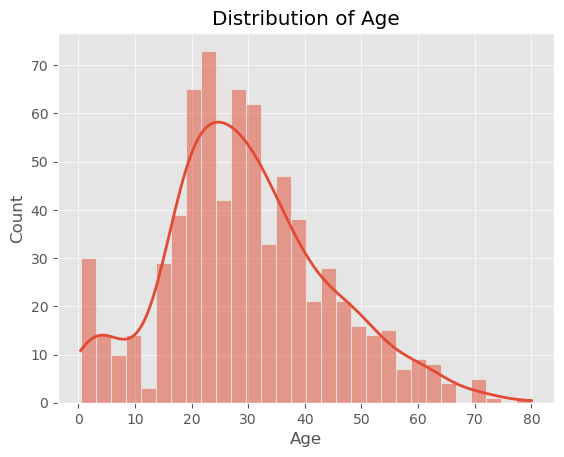

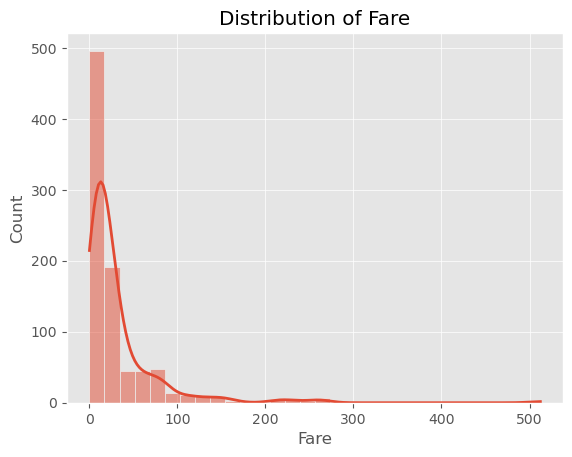

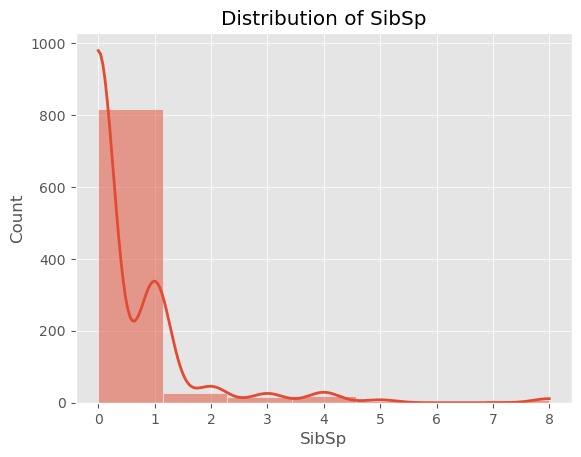

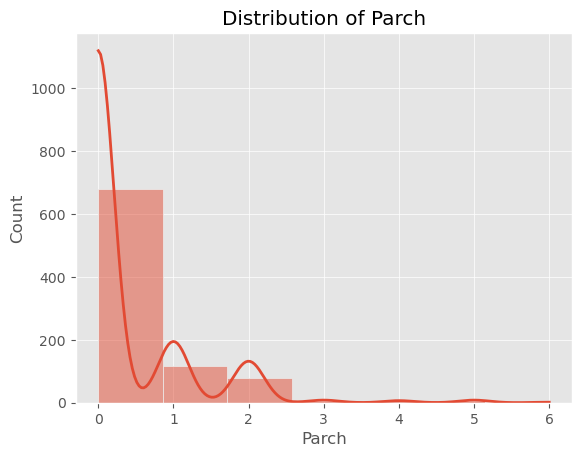

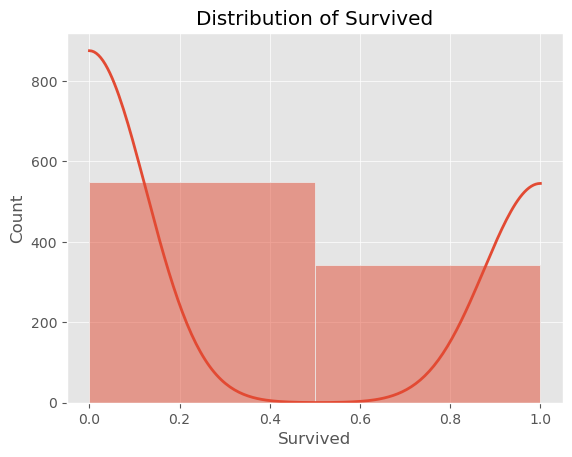

In [479]:
# just plot the distributions of all numerical columns
for col in df_num.columns:
    bins = min(30, df_num[col].nunique())
    sns.histplot(df_num[col], bins=bins, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

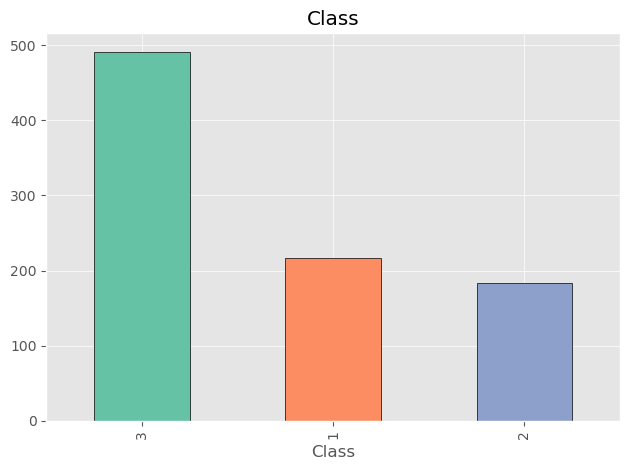

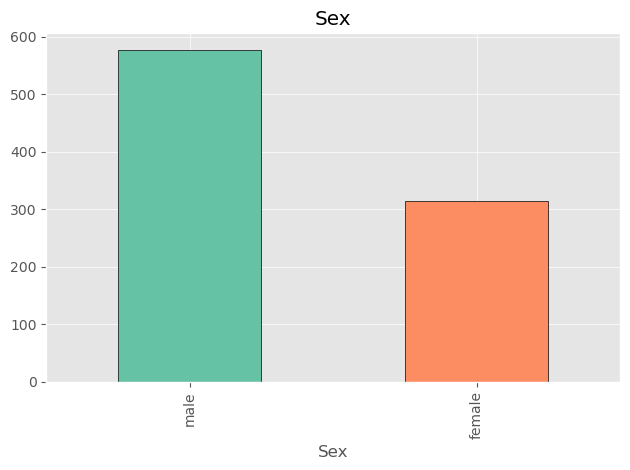

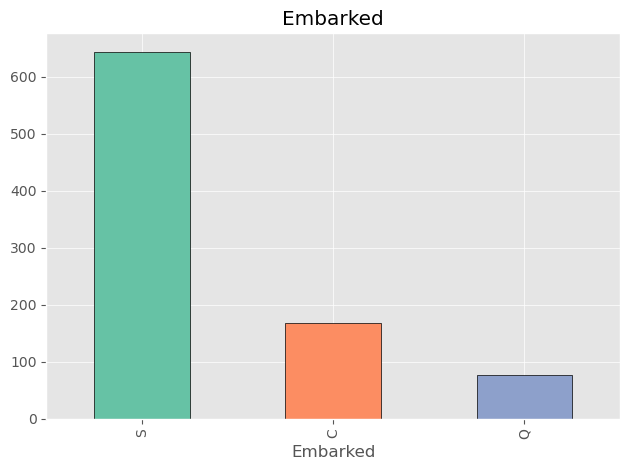

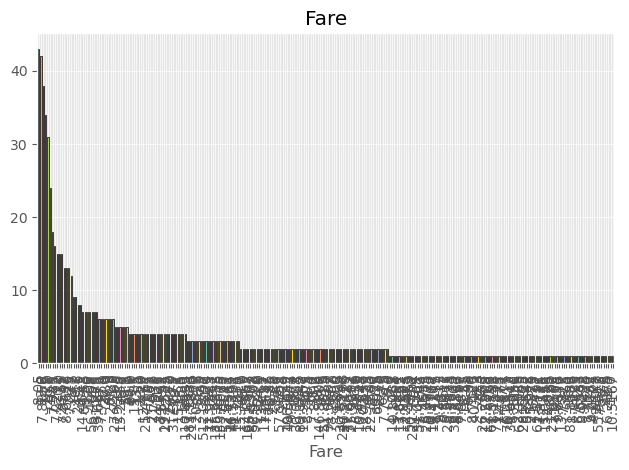

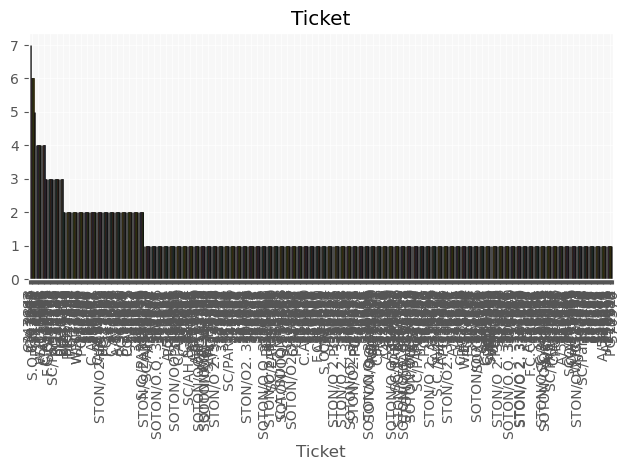

In [480]:
# for col in df_cat.columns:
#     sns.barplot(x=col, data=train, estimator='mean', ci=None)
#     sns.barplot(col) 

# sns.countplot(x='Pclass', hue='Survived', data=train) # 1st class passengers had a higher chance of survival

for col in df_cat.columns:
    counts = df_cat[col].value_counts()
    colors = sns.color_palette('Set2', n_colors=len(counts))
    counts.plot(kind='bar', color=colors, edgecolor='black')
    plt.title(col)
    plt.tight_layout()
    plt.show()

# lots of different categories for cabin and ticket


In [481]:
# something else that also might be useful are pivot tables. They let us see cross-tabulations of data by count or mean
for col in df_cat.columns:
    print(f'\nSurvival vs {col}')
    pivot = pd.pivot_table(train, index='Survived', columns=col, values='Id', aggfunc='count', margins=True)
    print(pivot)



Survival vs Class
Class       1    2    3  All
Survived                    
0          80   97  372  549
1         136   87  119  342
All       216  184  491  891

Survival vs Sex
Sex       female  male  All
Survived                   
0             81   468  549
1            233   109  342
All          314   577  891

Survival vs Embarked
Embarked    C   Q    S  All
Survived                   
0          75  47  427  549
1          93  30  217  340
All       168  77  644  889

Survival vs Fare
Fare       0.0  4.0125  5.0  6.2375  6.4375  6.45  6.4958  6.75  6.8583  6.95  \
Survived                                                                        
0         14.0     1.0  1.0     1.0     1.0   1.0     2.0   2.0     1.0   1.0   
1          1.0     NaN  NaN     NaN     NaN   NaN     NaN   NaN     NaN   NaN   
All       15.0     1.0  1.0     1.0     1.0   1.0     2.0   2.0     1.0   1.0   

Fare      6.975  7.0458  7.05  7.0542  7.125  7.1417  7.225  7.2292  7.25  \
Survived        

# Feature Relationships
* understanding how the features are related to each other
* scatterplots
* correlation and heatmaps
* Pairplots
* Group by comparisons

Index(['Id', 'Survived', 'Class', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked'],
      dtype='object')


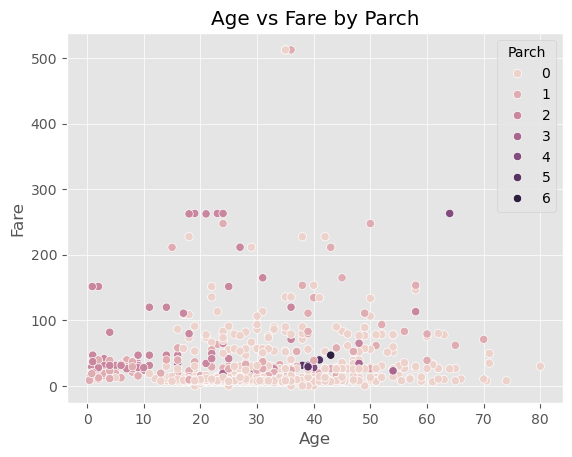

In [482]:
# we are also able to make scatterplots like this using sns
print(train.columns)
sns.scatterplot(x='Age', y='Fare', hue='Parch', data=train)
plt.title('Age vs Fare by Parch')
plt.show()

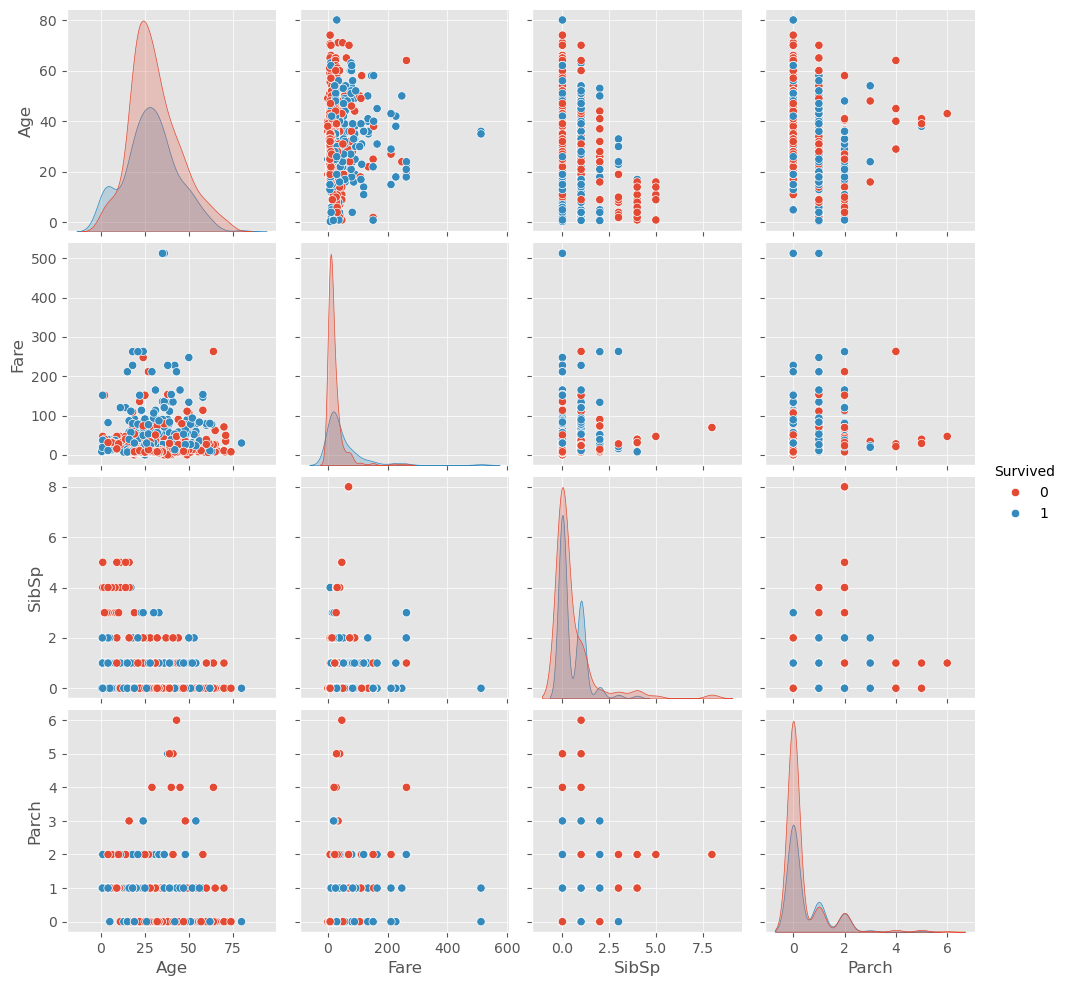

In [483]:
# can also use something called pairplots
sns.pairplot(train, hue='Survived', vars=['Age', 'Fare', 'SibSp', 'Parch'])

<Axes: >

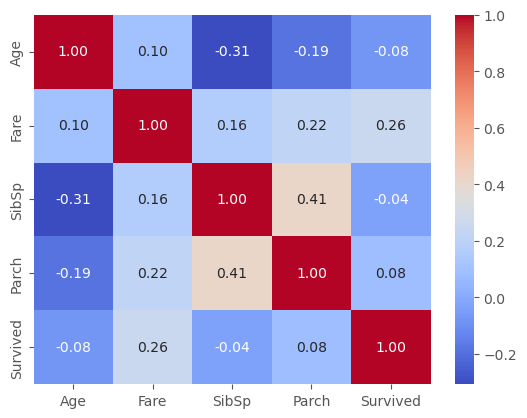

In [484]:
# we can also use the corr and heatmaps that we are already used to
corr = df_num.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f') # SibSp Age, Sibsp Parch, Fare Survived, Fare Parch all have some correlation
# for context, a correlatoin of 0.2 means that only 4% of the variance in one variable can be explained by the other variable

# Asking questions about the data
* trying to answer questions about the data using plots or statistics

C:\Users\benla\AppData\Local\Temp\ipykernel_2772\3939488084.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train.groupby('AgeGroup')['Survived'].mean().sort_index()


<Axes: xlabel='AgeGroup', ylabel='Survived'>

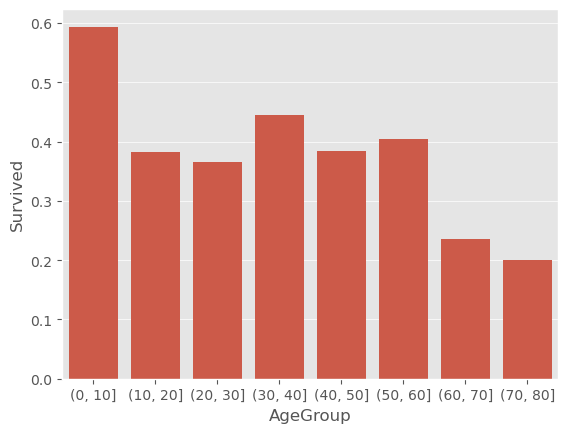

In [485]:
# what is the average fare by class?
train.groupby('Class')['Fare'].mean().sort_values(ascending=False)

train.query('Fare == 0').count()


# chances of survival by age group
train['AgeGroup'] = pd.cut(train['Age'], bins=range(0, 90, 10))
train.groupby('AgeGroup')['Survived'].mean().sort_index()

train['AgeGroup'].head()

sns.barplot(data = train, x='AgeGroup', y='Survived', errorbar=None)

In [486]:
# pivot table of survival rates across sex and class
pd.pivot_table(train, index='Class', columns='Sex', values='Survived', aggfunc='mean', margins=True)

Sex,female,male,All
Class,,,
1,0.968085,0.368852,0.629630
2,0.921053,0.157407,0.472826
3,0.500000,0.135447,0.242363
All,0.742038,0.188908,0.383838


In [487]:
# people over the age of 60 that survived
train.query('Age > 60')\
    .query('Survived == 1')

,Id,Survived,Class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,S,"(60, 70]"
483,484,1,3,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,S,"(60, 70]"
570,571,1,2,"Harris, Mr. George",male,62.0,0,0,S.W./PP 752,10.5000,S,"(60, 70]"
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,S,"(70, 80]"
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,NaN,"(60, 70]"


In [488]:
# which of the name titles are the most common?
train['Title'] = train['Name'].str.extract(r',\s*([^\.]+)\.')  # Extract title using regex
train['Title'].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

# Feature engineering
* how to interpolate/remove missing values
* how to encode categoricals (when nessecary)
* which additional features should I add

In [489]:
train = train.drop(columns=['AgeGroup', 'Title'])
train.isnull().sum()


Id            0
Survived      0
Class         0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
dtype: int64

In [490]:
train['Age'].describe()
train['Age'].isnull()
train['Age'].fillna(train['Age'].mean(), inplace=True)  # Fill missing ages with the mean
train['Age'].isnull().sum()  # Check if there are still missing values

C:\Users\benla\AppData\Local\Temp\ipykernel_2772\1438666860.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train['Age'].mean(), inplace=True)  # Fill missing ages with the mean


0

In [491]:
# at this point just drop all values that are still null 
train.dropna(inplace=True)

In [492]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        889 non-null    int64  
 1   Survived  889 non-null    int64  
 2   Class     889 non-null    int64  
 3   Name      889 non-null    object 
 4   Sex       889 non-null    object 
 5   Age       889 non-null    float64
 6   SibSp     889 non-null    int64  
 7   Parch     889 non-null    int64  
 8   Ticket    889 non-null    object 
 9   Fare      889 non-null    float64
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [493]:
train.head()

,Id,Survived,Class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [494]:
# first we change sex into binary
train['Sex'] = train['Sex'].map({'male':1, 'female':0})

In [495]:
# only grab features that I want
train = train[[ 'Survived', 'Class',  'Sex', 'Age', 'SibSp', 'Parch',
    'Fare', 'Embarked']]
train['Embarked'] = train['Embarked'].astype('category')

train.head()

,Survived,Class,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [496]:
# then we make 2 dataframes, one for trees and one for linear models
df_tree = train.copy()
df_linear = pd.get_dummies(train, columns=['Class', 'Embarked', ], drop_first=True).copy()

# Model creation
* make simple models and test performance
* analyze what they get right and wrong
* decide if we should improve current model, try another model, or go back to feature engineering
* work until model performance is arbitrarily high enough

In [497]:
# I will first make the tree models since it is easy to use xgboost
X = df_tree.drop(columns=['Survived'])
y = df_tree['Survived']

# split into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBClassifier(eval_metric='logloss', enable_categorical=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Accuracy: 0.797752808988764


<Axes: >

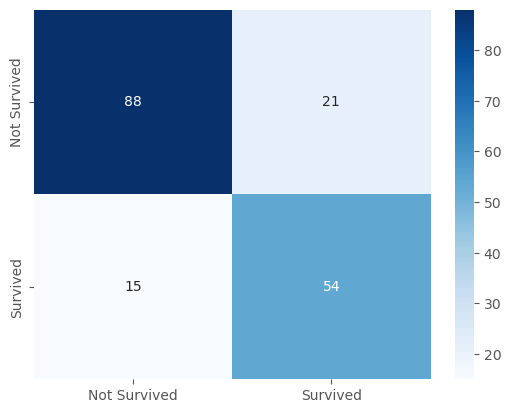

In [498]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])

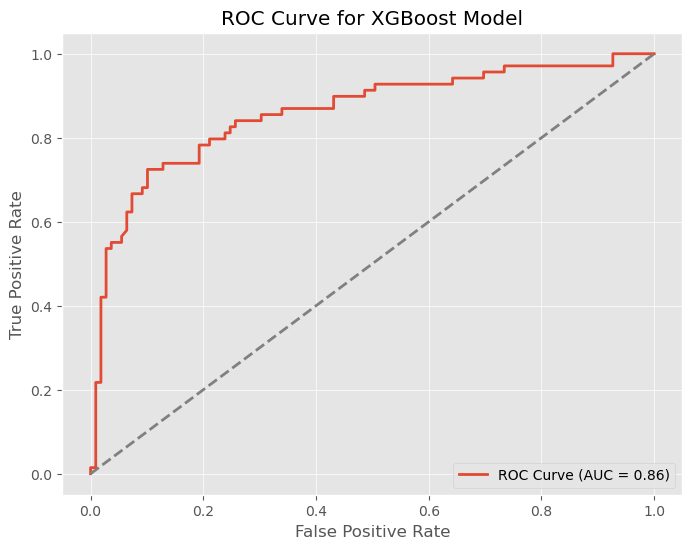

In [499]:
y_proba = model.predict_proba(X_test)[:, 1]  # Probability of class "1" (e.g., Survived)

# get the statistics
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
# compute the auc score
auc_score = roc_auc_score(y_test, y_proba)

# plot the roc curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line (random guess)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for XGBoost Model")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()